# **Guide: Converting Raw GC-MS Data into Complex Fluid Models**

📄 **Reference Publication**  
🔗 [RSC Journal Link (2024)](https://pubs.rsc.org/en/content/articlelanding/2024/dd/d3dd00245d)

---

## Overview

This notebook provides is a guide on the workflow for transforming **GC-MS data** of a **multi-component molecular mixture**—supplemented by **DFT calculations**—into a set of **data-driven representative molecular models**.

---

## Functional Breakdown

All essential user-facing functions are explained within this notebook.  
However, you'll also notice other functions for two primary reasons:

1. This module serves as a base for other Python packages (irrelevant classes have been removed).
2. Background operations: Many helper functions support behind-the-scenes processes.

---

## ⚠️ Important Usage Notes

🚀 **Always launch notebooks/scripts from the base directory of the cloned package.**  
This ensures:

1. 📁 The `modules/` folder can be properly located by Python.
2. 🗃️ Generated models are saved in a designated output directory, keeping your root workspace clean.

---

## 🐍🔗 Step 1: Import Required Python Modules

## 📁 *modules.sw_directories*

This module functions as a **file path manager and organizer** 🗂️.

It ensures that:
- 📌 All saved files are directed to appropriate folders based on the assigned **model name**.
- 🗃️ Project files remain clean, well-structured, and easy to navigate.

By automating directory creation and file sorting, it helps maintain an organized workspace throughout your modeling workflow.


In [1]:
# Import filepath manager
from modules.sw_directories import *

## ⚛️ *modules.sw_orca*

This module contains one core class that:
- 🔄 Converts raw **DFT data** (from your input `.csv`)  
- 🧱 Transforms each molecule’s data into a structured **Python object**  

This greatly simplifies handling, accessing, and integrating quantum chemistry results throughout the modeling process.


In [2]:
# Import sw_orca to read raw data from csv datafile
from modules.sw_orca import *

## 🧪 *modules.sw_complex_fluid_models*

This is the **core module** of the project 🔧.

It processes groups of molecules from your raw **DFT dataset** and generates a range of **complex fluid models** 🧬.  
The primary output is an instance of the `complex_fluid_model` class, which includes several attributes — the most important being the **group of selected molecules** (more on this later).

---

### 🧠 Model Types Generated:

- 🧱 **FT_model** — Fixed Threshold Model  
- ⚖️ **PT_model** — Proportional Threshold Model  
- 🌐 **AG_model** — Abundancy Grouping Model  
- 🎯 **SG_model** — Scored Grouping Model  


In [3]:
# Import complex fluid model functions
from modules.sw_complex_fluid_models import *

### 📂 *os* module

The `os` module is used to:

- 🛠️ Assist with **initializing** the file path manager  
- 📁 **Create and manage file paths** to access data files reliably across operating systems



In [4]:
# Import os
import os as os

## 📁 Step 2: Initialise Filepath Manager

The first step is to set up the **file system** structure using the command below.  
This will automatically generate the necessary folders to organize your raw and processed data.

📌 *Note:* You must always run the initialization command — but folders will only be created the **first time** the `manager` object is instantiated.

🗃️ Once initialized, a target folder will be available for you to **copy your raw data files into** (details and examples below).


In [5]:
# call 'BioOilDirs'
manager = BioOilDirs(os.getcwd())

## 🌲 File Structure Overview

Once initialized, the filepath manager will create a file tree like this:

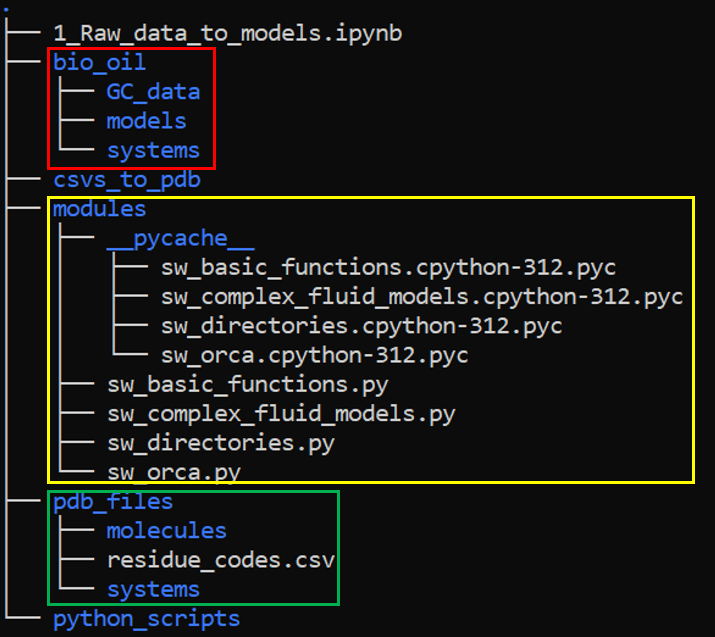

### 🎯 Key Areas Highlighted:

- 🔴 **Red**: The main project directory — models are stored here.  
  ⤷ Place all **raw data** files in the `GC_data/` folder.  

- 🟡 **Yellow**: The `modules/` directory — contains all core source code.  

- 🟢 **Green**: The `molecules/` directory — holds individual molecule data (not critical at this stage).

> 💡 **Note**: The folders and class names (e.g., `bio_oil`) come from the example use case in the published research. These can be adapted as needed for other projects.

---

## 📦 Placing Raw Data

Raw data should be placed inside the `GC_data/` folder and must include:

1. 🧪 **Quantification data** — e.g., GC-MS or LC-MS output  
2. 🧬 **SMILES strings** — used for molecular analysis with RDKit  
3. ⚛️ **DFT data** — optional but required for post-analysis and model scoring  
   _(Note: FT, PT, and AG models do not require DFT data)_

---

### 📁 Example Raw Data Structure

Our provided dataset (already inside `GC_data/`) is an ideal reference:
 
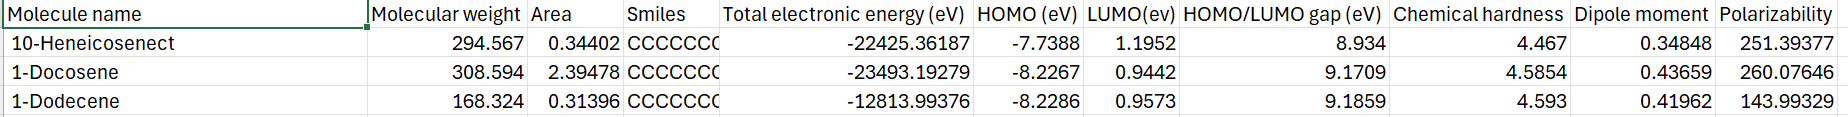

> ⚠️ **Important:**  
> The raw data file **must match the format** (column number and order) of the provided example.

---

## 📂 Final File Tree (After Data Is Added)

After copying the raw data, your directory will resemble the following:

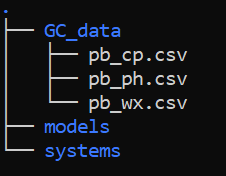


## 🧬 Step 3: Create an Instance of Molecule Objects for a Raw Data File

This section will guide you through the process of creating models as described in the publication, using **one set of raw data** as an example.

For this example, we will use the `pb_cp.csv` file — containing **GC-MS** and **DFT data** for each molecule in the pine-bark derived bio-oil fraction.

---

### 🗂️ Step 3.1: Get the Filepath of the Folder

The first task is to obtain the **filepath** of the folder containing the raw data. We will use the **manager module** for this, which has an attribute pointing to the **GC-Data folder**
as shown below.

In [6]:
# Show filepath for 'GC_data' directory
print(manager.bio_oil_GC_data)

/home/dan/polymersimulator/bio_oil_package/bio_oil/GC_data


### 🧩 Step 3.2: Create a Filepath to the Data File

With the **GC data folder filepath** obtained, we can now use the `os` module to generate the full path to the specific raw data file, **`pb_cp.csv`**.

- The naming convention used is:
  - **pb** = Pine Bark
  - **cp** = Complete

This means **`pb_cp.csv`** contains the complete set of GC-MS and DFT data for the pine-bark-derived bio-oil.

In [7]:
# data file name
data_filename = "pb_cp.csv"

# data folder path
data_folder = manager.bio_oil_GC_data

# create filepath to data file
data_filepath = os.path.join(data_folder, data_filename) 

# show data filepath
print(data_filepath)

/home/dan/polymersimulator/bio_oil_package/bio_oil/GC_data/pb_cp.csv


### 🔄 Step 3.3: Convert Raw Data to Molecule Objects

Now that we have the full **data file path**, we can pass this to the function `csv_to_orca_class`, which will convert the raw data into a list of **molecule objects**. These objects can be easily manipulated and analyzed using Python.

Pass the data_filepath to the function as shown below.

In [2]:
# Extract the csv data into list
molecules = csv_to_orca_class(data_filepath)

# Check the number of molecules in the list 
print(f"There are {len(molecules)} molecules in the dataset")

NameError: name 'csv_to_orca_class' is not defined

### 🧬 Step 3.4: What Information is Contained in a Molecule Object? 

Now that we've created the list of molecule objects using the `csv_to_orca_class` function, let's explore what information each molecule object contains.

#### 📚 Step 3.4.1: What is a Python Object?

In Python, an **object** is a collection of data (attributes) and methods (functions) that act on the data. In our case, each **molecule** is represented as an object, and these objects are stored in a **list**.

Each molecule object holds a variety of associated information, such as:

- **Molecular properties** (e.g., molecular weight, structure)
- **GC-MS data** (e.g., retention time, intensity)
- **DFT data** (e.g., energy, optimization results)

#### 🧪 Step: 3.4.2 Inspecting a Single Molecule Object

To understand how the molecule object is structured, let’s inspect the attributes of one molecule.

In [9]:
# define a single molecule from the list of molecules
molecule = molecules[0]

# show all attributes
molecule.__dict__

{'name': '10-Heneicosenect',
 'smiles': 'CCCCCCCCCCC=CCCCCCCCCC',
 'mw': 294.57,
 'peak_area': '0.34402',
 'total_energy': '-22425.36187',
 'homo_lumo_gap': '8.934',
 'chemical_hardness': '4.467',
 'dipole_moment': '0.34848',
 'polarizability': '251.39377',
 'volume': 355.33600000000007}

#### 🔑 Step 3.4.3: Molecule Object Attributes:

- **`name`**: The name of the molecule  
- **`smiles`**: The SMILES notation of the molecule  
- **`mw`**: **Molecular Weight** (g/mol)  
- **`peak_area`**: The proportion of the molecule in the characterization (e.g., peak area in GC-MS)  
- **`homo_lumo_gap`**: **HOMO-LUMO gap** (energy difference between highest occupied and lowest unoccupied molecular orbitals)  
- **`chemical_hardness`**: **Chemical hardness** (related to molecular stability)  
- **`dipole_moment`**: The **dipole moment** (measure of polarity)  
- **`polarizability`**: The **polarizability** (how easily the electron cloud is distorted)  
- **`volume`**: The **molecular volume**  

##### 🧪 DFT-Calculated Attributes (Italicized):

Some of the above attributes are calculated from **DFT data** (and are shown in *italics*), including:

- *`homo_lumo_gap`*
- *`chemical_hardness`*
- *`dipole_moment`*
- *`polarizability`*

The remaining attributes, such as **molecular weight** (`mw`) and **peak area**, are generally collated from the raw data files (e.g., GC-MS).

#### 🔍 Step 3.4.4: Accessing Attributes

All of these attributes can be accessed directly from the molecule object. For example, to retrieve the molecular weight of the first molecule in the list:

In [10]:
# extract data for the initial molecule
print(f"The molecule is called {molecule.name} and has a molecular weight of {molecule.mw} g/mol.")
print(f"It has an estimated volume of {molecule.volume:.3f} A^3 and a peak area in the charecterization of {float(molecule.peak_area):.3f} %.")

The molecule is called 10-Heneicosenect and has a molecular weight of 294.57 g/mol.
It has an estimated volume of 355.336 A^3 and a peak area in the charecterization of 0.344 %.


## 🛠️ Step 5: Generating Models for This Dataset

Now that we have a list of molecule objects containing all the necessary data, we can proceed to generate the various models. These models will be created using the following functions:

- **FT Model (Fixed Threshold)**
- **PT Model (Proportional Threshold)**
- **AG Model (Abundancy Grouping)**
- **SG Model (Scored Grouping)**

Each of these functions takes the list of molecule objects and applies predetermined algorithms to create a new list of molecules specific to that model type. Each model will contain unique attributes based on its algorithm.

### 🚀 **Output: Model-Specific Molecule Lists**

After running the functions, you will receive a **new list** of molecule objects for each model. These objects will carry attributes specific to that model type, such as:

- **FT Model**: Molecules sorted by a fixed threshold
- **PT Model**: Molecules sorted proportionally based on a threshold
- **AG Model**: Molecules grouped by their abundance in the mixture
- **SG Model**: Molecules grouped and scored according to certain criteria

Each model allows for different levels of detail depending on how the molecules are categorized and processed.

---

### 🏁 **Benchmark Model: The "ALL" Model**

In addition to the above models, an **ALL** model will be generated. This model serves as a **benchmark** containing **all molecules** in the fraction. It provides a baseline for comparison with the other models.

This means that, regardless of the algorithm applied, the **ALL model** will always include every molecule, ensuring that you can compare the results from the other models with a comprehensive, baseline dataset.

### 💡 Step 5.1: *FT Model (Fixed Threshold)*

The **FT model** is generated by selecting molecules that have a **peak area** above a set threshold. This allows us to filter out molecules based on their relative abundance in the mixture, making the model more focused on significant components.

### 🧩 **To generate the FT model, we pass three inputs to the function**:

1. **`model_name`**: The name should match that of your CSV file (without the .csv extension). The resulting model files will be named as `model_name_FT`, `model_name_PT`, etc., based on the model type.
2. **`orca_molecules`**: The list of molecule objects containing the associated data. These are called **"orca_molecules"** because the DFT data originates from **ORCA** calculations.
3. **`selection_threshold`**: The selection threshold for the model. Any molecule with a **peak area** greater than this threshold will be selected for the FT model.

### 🔢 **Selection Equation**

The selection process for the FT model is governed by the following equation, as detailed in the publication:

$$ a_i > X $$

Where:
- **`a_i`** is the **peak area** of a given molecule
- **`X`** is the **selection threshold** (anything with a peak area greater than `X` will be selected)

### 🔍 Example Code to Generate the FT Model:


In [11]:
# Assign variables for the function - these can also be passed directly into the function
model_name = "pb_cp"
orca_molecules = molecules
selection_threshold = 5

# Generate FT model
pb_cp_FT_model = complex_fluid_models.fixed_threshold_model(model_name=model_name, orca_molecules=orca_molecules, selection_threshold=selection_threshold)

### 📊 Step 5.1.1: *FT Model Output: `pb_cp_FT_model`*

The **FT model** generates its own object, called `pb_cp_FT_model`, which contains specific attributes related to the selection and grouping of molecules based on their **peak area**.

### 🧬 **Attributes of the FT Model Object**

Once the FT model is generated, it will have its own set of attributes, distinct from the original list of molecules. These attributes include:

- **`model_name`**: The name of the model (e.g., `"pb_cp_FT_model"`)
- **`molecules`**: A list of molecules that were selected for the model, based on the **peak area** threshold.
- **`min_mols_for_sim`**: The total number of molecules that comprise the final model (including multiple instances of the same molecule)
- **`model_type`**: The type of model (in this case, it will be `"FT"` for Fixed Threshold).
  
### 🔍 **Inspecting the FT Model Object**

To examine the FT model's attributes, you can inspect the object using the following code

In [3]:
# Example: Inspecting the FT model's attributes
print(f"Model Name: {pb_cp_FT_model.model_name}")
print(f"Number of Selected Molecules: {pb_cp_FT_model.min_mols_for_sim}")

# Accessing the list of selected molecules
print(f"Selected Molecules: {pb_cp_FT_model.molecules}")  # Display the first 5 molecules

NameError: name 'ft_model' is not defined

All of the associated attributes can also be seen using the following code

In [12]:
# Show model attributes
pb_cp_FT_model.__dict__

{'molecules': [<modules.sw_orca.orca_molecule at 0x7fd25f43fa40>,
 'group_molecules': None,
 'molecule_ratios': [0.35150163884035635,
  0.33479731424430303,
  0.3137010469153407],
 'model_type': 'FT_model',
 'model_name': 'pb_cp_FT_model',
 'wa_mw': 195.21901675982423,
 'wa_chemical_hardness': 4.163840187289942,
 'wa_polarizability': 147.52132700527142,
 'wa_dipole_moment': 1.8194826431063578,
 'wa_total_energy': -16472.147347738777,
 'wa_oxygen_content': 13.523202854191158,
 'wa_nitrogen_content': 0.0,
 'wa_sulfur_content': 0.0,
 'min_mols_for_sim': 12,
 'min_atoms_for_sim': 440,
 'min_vol_for_sim': 2517.9914113025025}

### 🧬 Step 5.1.2: *Additional Attributes in the FT Model*

While most of the attributes in the FT model are straightforward, some may need further clarification. Here's an explanation of the attributes that might not be as self-explanatory:

### 🏷️ *Key Attributes Explained*:

- **`wa_attributes`**: This stands for **"weighted_average"**. It refers to the weighted average of a given molecule's attribute across all molecules in the model. The weighting is based on the **peak area** of each molecule. Essentially, it provides an average value of an attribute, considering the abundance of each molecule in the model.
  
- **`molecules`**: This is the list of **selected molecules** for the FT model. These molecules were chosen based on their **peak area** exceeding the selection threshold.

- **`molecule_ratios`**: This is the ratio of each molecule's **contribution** in the final model. These ratios are determined based on the molecule's **peak area** relative to the total peak areas of all selected molecules.

- **`group_molecules`**: In the **FT model**, this attribute is **None**. This is because the FT model does not group molecules based on any shared characteristics; molecules are selected individually based on their peak areas.

---

### 📊 *Printing Information About the FT Model*

To better understand the generated **FT model**, you can print relevant information, including the model's attributes and key statistics:

In [13]:
# Lets print some info about this model
model = pb_cp_FT_model
print(f"Information about the {model.model_name}.")
print(f"The type of this model is: {model.model_type}.")
print(f"For an unbiased simulation, the number of atoms required for simulation is {model.min_atoms_for_sim} and the number of molecules is {model.min_mols_for_sim}.")
print("")
print("The weighted averages of each parameter of the model will be printed below.")
print(f"mw: {model.wa_mw:.3f} g/mol")
print(f"chemical hardness: {model.wa_chemical_hardness:.3f} eV")
print(f"dipole moment: {model.wa_dipole_moment:.3f} D")
print(f"polarizability: {model.wa_polarizability:.3f} a.u.")
print(f"total energy: {model.wa_total_energy:.3f} eV")
print(f"oxygen content: {model.wa_oxygen_content:.3f} %")
print(f"nirtogen content: {model.wa_nitrogen_content:.3f} %")
print(f"sulfur content: {model.wa_sulfur_content:.3f} %")

Information about the pb_cp_FT_model.
The type of this model is: FT_model.
For an unbiased simulation, the number of atoms required for simulation is 440 and the number of molecules is 12.

The weighted averages of each parameter of the model will be printed below.
mw: 195.219 g/mol
chemical hardness: 4.164 eV
dipole moment: 1.819 D
polarizability: 147.521 a.u.
total energy: -16472.147 eV
oxygen content: 13.523 %
nirtogen content: 0.000 %
sulfur content: 0.000 %


## 🔄 Step 5.2: *PT Model (Proportional Threshold)*

The **PT model** is generated by selecting molecules that exceed a dynamically defined peak area threshold, without requiring user input for the threshold value. This approach adjusts the threshold automatically based on the distribution of peak areas across the molecules.

### 🧩 **To generate the PT model, we pass two inputs to the function**:

1. **`model_name`**: The name of your CSV file (e.g., `"pb_cp"`) without the .csv extension. The resulting model files will be named as `model_name_PT`, `model_name_FT`, and so on for different models.
2. **`orca_molecules`**: The list of molecule objects with the associated data. These molecules contain **DFT data** from ORCA, making them compatible with the model generation process.

### 🔢 **Selection Equation**

The selection for the **PT model** is determined by the following equation, as outlined in the publication:

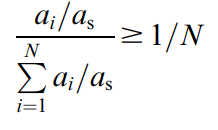

Where:
- **`a_i`** is the **peak area** of a given molecule
- **`a_s`** is the **sum of peak areas** for all molecules
- **`N`** is the **total number of molecules** in the dataset

This equation ensures that the threshold is dynamically calculated, allowing for the selection of molecules based on their proportional contribution relative to the overall dataset.

### 🔍 Example Code to Generate the PT Model:

In [14]:
# Assign variables for the function - these can also be passed directly into the function
model_name = "pb_cp"
orca_molecules = molecules

# Generate PT model
pb_cp_PT_model = complex_fluid_models.proportional_threshold_model(model_name="pb_cp", orca_molecules=molecules)

## ⚠️ Step 5.2.1: *Important – Structure of All Final Models*

It is **crucial** to understand that all final models—whether generated via **FT**, **PT**, **AG**, or **SG** methods—are instantiated using the same Python class: `complex_fluid_model`. This uniformity enables direct comparison of models and simplifies further analysis.

---

### 🧩 **Internal Structure of a `complex_fluid_model` Object**

Each model created has the following standardized components:

- **`model_name`**: The full name of the model, automatically suffixed with the model type (e.g., `"pb_cp_FT_model"`).
- **`molecules`**: The list of selected molecule objects included in the model.
- **`group_molecules`**: A list of groupings if group-based selection is used (e.g. in **AG** or **SG**). Otherwise, this is `None`.
- **`molecule_ratios`**: A list representing the relative ratio (based on peak area) of each molecule in the model.
- **`model_type`**: A string identifier for the model type (e.g., `"FT_model"`, `"SG_model"`).
- **`wa_` attributes**: Weighted averages for key molecular properties:
  - `wa_mw`: Weighted average molecular weight.
  - `wa_chemical_hardness`: Weighted average chemical hardness.
  - `wa_polarizability`: Weighted average polarizability.
  - `wa_dipole_moment`: Weighted average dipole moment.
  - `wa_total_energy`: Weighted average DFT-calculated total energy.
  - `wa_oxygen_content`, `wa_nitrogen_content`, `wa_sulfur_content`: Atom-level content percentages by weight.
- **Simulation Requirements**:
  - `min_mols_for_sim`: Minimum number of molecules needed for simulation.
  - `min_atoms_for_sim`: Minimum number of atoms required.
  - `min_vol_for_sim`: Minimum volume of the model system.

---

### 📝 **Example Representation**

Here’s a conceptual overview of what a finalized model (e.g., `pb_cp_FT_model`) may look like once created:

```python
pb_cp_PT_model = complex_fluid_model(
    molecules=[<Molecule Object 1>, <Molecule Object 2>, ...],
    group_molecules=None,
    molecule_ratios=[0.15, 0.10, 0.05, ...],
    model_type="FT_model",
    model_name="pb_cp"
)
```
### 🔍 Example Code to access key attributes:

In [ ]:
# Accessing key attributes:
pb_cp_FT_model.model_name               # 'pb_cp_FT_model'
pb_cp_FT_model.wa_mw                    # Weighted average molecular weight
pb_cp_FT_model.group_molecules          # None (for FT models)
pb_cp_FT_model.min_atoms_for_sim        # e.g., 290


### 📊 Step 5.2.2: *Printing Information About the FT Model*

To better understand the generated **PT model**, you can print relevant information, including the model's attributes and key statistics:

In [15]:
# Show model attributes
pb_cp_PT_model.__dict__

{'molecules': [<modules.sw_orca.orca_molecule at 0x7fd25f43e7e0>,
 'group_molecules': None,
 'molecule_ratios': [0.032612230423918954,
  0.033749337481935655,
  0.053238671553911945,
  0.04679924109338767,
  0.01478348119810502,
  0.025394937027419667,
  0.02041045887921281,
  0.03256647378062631,
  0.025318403594293274,
  0.01886481036322604,
  0.08969854542899304,
  0.016869493882500208,
  0.037276139708105296,
  0.025855227070065948,
  0.04008772202185533,
  0.03201575989528265,
  0.08543582385653331,
  0.029839051007218106,
  0.06668976287709058,
  0.038798092819529804,
  0.019227595177903463,
  0.02397021678299204,
  0.01864855575147388,
  0.024630964501015633,
  0.015107046032817317,
  0.052059620906210316,
  0.08005233688437569],
 'model_type': 'PT_model',
 'model_name': 'pb_cp_PT_model',
 'wa_mw': 188.9778647580699,
 'wa_chemical_hardness': 4.066922788605942,
 'wa_polarizability': 144.07593989444922,
 'wa_dipole_moment': 1.5370004480419697,
 'wa_total_energy': -15936.6287821109

In [16]:
# Lets print some info about this model
model = pb_cp_PT_model
print(f"Information about the {model.model_name}.")
print(f"The type of this model is: {model.model_type}.")
print(f"For an unbiased simulation, the number of atoms required for simulation is {model.min_atoms_for_sim} and the number of molecules is {model.min_mols_for_sim}.")
print("")
print("The weighted averages of each parameter of the model will be printed below.")
print(f"mw: {model.wa_mw:.3f} g/mol")
print(f"chemical hardness: {model.wa_chemical_hardness:.3f} eV")
print(f"dipole moment: {model.wa_dipole_moment:.3f} D")
print(f"polarizability: {model.wa_polarizability:.3f} a.u.")
print(f"total energy: {model.wa_total_energy:.3f} eV")
print(f"oxygen content: {model.wa_oxygen_content:.3f} %")
print(f"nirtogen content: {model.wa_nitrogen_content:.3f} %")
print(f"sulfur content: {model.wa_sulfur_content:.3f} %")

Information about the pb_cp_PT_model.
The type of this model is: PT_model.
For an unbiased simulation, the number of atoms required for simulation is 63071 and the number of molecules is 1894.

The weighted averages of each parameter of the model will be printed below.
mw: 188.978 g/mol
chemical hardness: 4.067 eV
dipole moment: 1.537 D
polarizability: 144.076 a.u.
total energy: -15936.629 eV
oxygen content: 13.280 %
nirtogen content: 0.000 %
sulfur content: 0.000 %


## 🔄 Step 5.3: *AG Model (Abundancy Grouping Model)*

The **AG model** is generated by grouping molecules based on their **structural similarities** and **heteroatom content**. After grouping, the most **abundant molecule** in each group is selected. This model is useful for identifying dominant species within certain structural or functional classes.

### 🧩 **To generate the AG model, we pass two inputs to the function**:

1. **`model_name`**: The name of your CSV file (e.g., `"pb_cp"`) without the .csv extension. The resulting model files will be named as `model_name_AG`, `model_name_FT`, and so on for different models.
2. **`orca_molecules`**: The list of molecule objects with the associated data. These molecules contain **DFT data** from ORCA, which allows the model to consider electronic structure information during the selection process.

### 🔍 **Selection Criteria for AG Model**

The **AG model** follows these steps:
1. **Grouping**: Molecules are grouped based on similarities in **structure** and **heteroatom content** (i.e., the type and number of non-carbon atoms present in the molecule).
2. **Most Abundant Selection**: For each group, the molecule with the **highest peak area** (i.e., the most abundant molecule) is selected for inclusion in the model.

This approach ensures that the most **representative molecules** from each group are included in the final model, allowing for a more balanced representation of the dataset and visual representaiton of how
the groups are sorted is shown below.

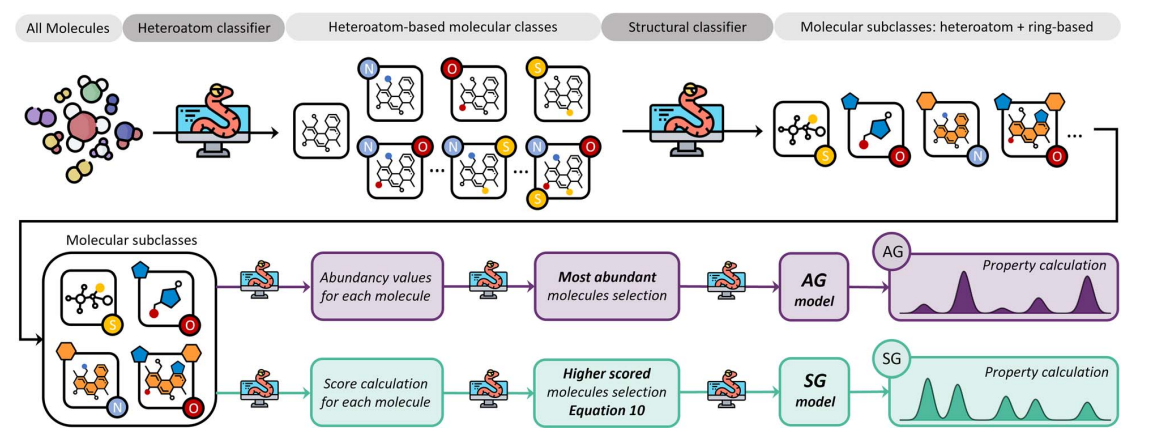.

### 🔍 **Example Code to Generate the AG Model**:

In [17]:
# Generate AG model - with a useful name
pb_cp_AG_model = complex_fluid_models.abundancy_grouped_model(model_name="pb_cp", orca_molecules=molecules)

## 🧩 Step 5.3.1: *Structure of the Outputted AG Model*

As with the **FT** and **PT models**, the structure of the **AG model** remains the same. However, there is a key difference: the **group_molecules** attribute is **no longer `None`**. This attribute now contains the actual groups of molecules from which the selection is made.

### 🔍 **Key Difference in Structure**:
- In the **FT** and **PT models**, **group_molecules** was set to **None** because no grouping was done during the selection process.
- In the **AG model**, the molecules are grouped by structure and heteroatom content, so the **group_molecules** attribute now holds **the actual groups**. Each molecule in the model will be associated with its corresponding group.

### 🧬 **Structure of the AG Model**

The **AG model** follows the same structure as the other models, with the following key attributes:

1. **`model_name`**: The name of the model, e.g., `"pb_cp_AG_model"`.
2. **`selected_molecules`**: The list of molecules selected for the model, which are the most abundant molecules from each group.
3. **`selection_method`**: The method used to select the molecules, i.e., "AG" for Abundancy Grouping.
4. **`wa_attributes`**: The weighted averages of various molecular attributes (e.g., molecular weight, dipole moment, etc.) calculated from the selected molecules.
5. **`molecule_ratios`**: The ratio of each molecule's contribution to the final model, calculated based on its peak area.
6. **`group_molecules`**: The groups of molecules, where each group consists of molecules with similar structures and heteroatom content. This is no longer `None` but contains actual groups.
7. **`num_selected_molecules`**: The total number of molecules included in the model after applying the selection criteria.

### 📊 **Example Model Structure for AG Model**:

```python
# Example structure for AG model
ag_model = {
    "model_name": "pb_cp_AG_model",
    "selected_molecules": [<Molecule Object 1>, <Molecule Object 2>, ...],
    "selection_method": "AG",  # Selection method used: AG (Abundancy Grouping)
    "wa_attributes": {"mw": 200.5, "dipole_moment": 1.2, ...},
    "molecule_ratios": [0.1, 0.15, 0.05, ...],
    "group_molecules": {
        "group_1": [<Molecule Object 1>, <Molecule Object 3>, ...],  # Group 1 of selected molecules
        "group_2": [<Molecule Object 2>, <Molecule Object 4>, ...],  # Group 2 of selected molecules
        ...
    },
    "num_selected_molecules": 30  # Total number of molecules in the final model
}
```
### 📊 Step 5.3.2: *Printing Information About the AG Model*

In [18]:
# Show model attributes
pb_cp_AG_model.__dict__

{'molecules': [<modules.sw_orca.orca_molecule at 0x7fd25f4608c0>,
 'group_molecules': [[<modules.sw_orca.orca_molecule at 0x7fd25f4601d0>,
 'molecule_ratios': [0.02015524235417611,
  0.5723300490177102,
  0.020013444099941463,
  0.23650772501062414,
  0.15099353951754801],
 'model_type': 'AG_model',
 'model_name': 'pb_cp_AG_model',
 'wa_mw': 210.42959924776346,
 'wa_chemical_hardness': 4.232922624242967,
 'wa_polarizability': 165.15302923925344,
 'wa_dipole_moment': 1.5091704133772001,
 'wa_total_energy': -17157.376269773624,
 'wa_oxygen_content': 8.36950139125679,
 'wa_nitrogen_content': 0.0,
 'wa_sulfur_content': 0.0,
 'min_mols_for_sim': 299,
 'min_atoms_for_sim': 11816,
 'min_vol_for_sim': 69933.85429078995}

In [19]:
# Lets print some info about this model
model = pb_cp_AG_model
print(f"Information about the {model.model_name}.")
print(f"The type of this model is: {model.model_type}.")
print(f"For an unbiased simulation, the number of atoms required for simulation is {model.min_atoms_for_sim} and the number of molecules is {model.min_mols_for_sim}.")
print("")
print("The weighted averages of each parameter of the model will be printed below.")
print(f"mw: {model.wa_mw:.3f} g/mol")
print(f"chemical hardness: {model.wa_chemical_hardness:.3f} eV")
print(f"dipole moment: {model.wa_dipole_moment:.3f} D")
print(f"polarizability: {model.wa_polarizability:.3f} a.u.")
print(f"total energy: {model.wa_total_energy:.3f} eV")
print(f"oxygen content: {model.wa_oxygen_content:.3f} %")
print(f"nirtogen content: {model.wa_nitrogen_content:.3f} %")
print(f"sulfur content: {model.wa_sulfur_content:.3f} %")

Information about the pb_cp_AG_model.
The type of this model is: AG_model.
For an unbiased simulation, the number of atoms required for simulation is 11816 and the number of molecules is 299.

The weighted averages of each parameter of the model will be printed below.
mw: 210.430 g/mol
chemical hardness: 4.233 eV
dipole moment: 1.509 D
polarizability: 165.153 a.u.
total energy: -17157.376 eV
oxygen content: 8.370 %
nirtogen content: 0.000 %
sulfur content: 0.000 %


## 🔥 Step 5.4: *SG Model (Scored Grouping Model)*

The **SG model** is generated by grouping molecules based on their **structural similarities** and **heteroatom content**. Once the molecules are grouped, the one with the **highest score** in each group is selected. The scoring mechanism considers weighted averages of attributes within each group to determine the highest scoring molecule.

### 🧩 **To generate the SG model, we pass two inputs to the function**:

1. **`model_name`**: The name of your CSV file (e.g., `"pb_cp"`). The resulting model files will be named `model_name_SG` (and similarly for other models).
2. **`orca_molecules`**: The list of molecule objects with the associated data. These molecules contain **DFT data** from ORCA, which will be used for scoring and selecting molecules.

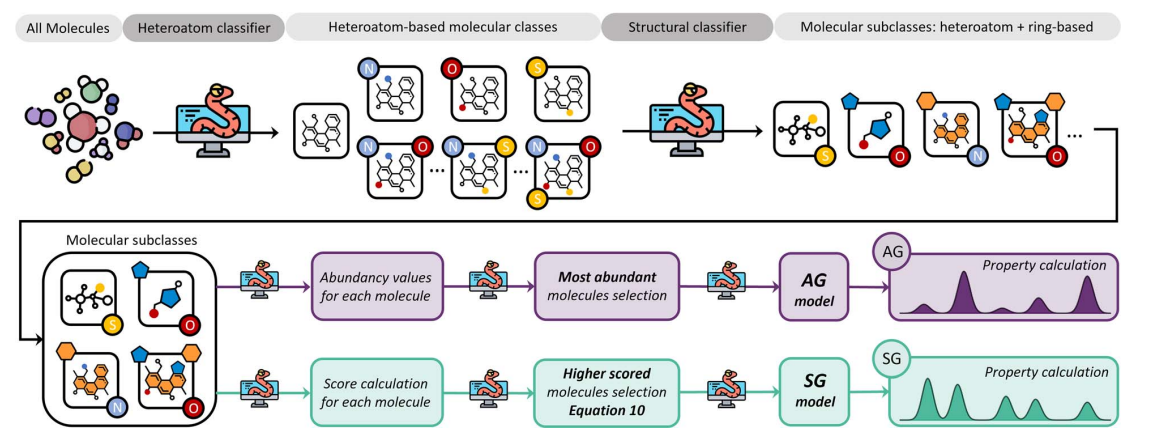                                                                                                                                                  
                                                                                                                                                  
### 🔍 **Selection Criteria for SG Model**

The **SG model** follows these steps:
1. **Grouping**: Molecules are grouped based on their **structure** and **heteroatom content** (the same way the as in the AG model).
2. **Scoring**: For each molecule, a **score** is calculated based on the following formula:

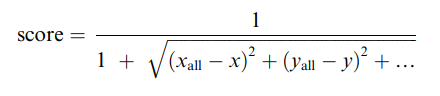)

Where:
- **X** represents an attribute of an individual molecule (e.g., molecular weight, dipole moment, etc.).
- **Xall** is the weighted average of that attribute across the group of molecules.
- The score is calculated for each molecule in the group, and the molecule with the highest score is selected.

### 📊 **Example Code to Generate the SG Model**:

In [20]:
# Generate SG model - with a useful name
pb_cp_SG_model = complex_fluid_models.scored_grouped_model(model_name="pb_cp", orca_molecules=molecules)

### 📊 Step 5.4.1: *Printing Information About the SG Model*

In [21]:
# Show model attributes
pb_cp_SG_model.__dict__

{'molecules': [<modules.sw_orca.orca_molecule at 0x7fd25f4601d0>,
 'group_molecules': [<modules.sw_complex_fluid_models.complex_fluid_model at 0x7fd25f43e240>,
 'molecule_ratios': [0.0188478, 0.5352038, 0.0187152, 0.2211658, 0.1411988],
 'model_type': 'SG_model',
 'model_name': 'pb_cp_SG_model',
 'wa_mw': 161.673523564,
 'wa_chemical_hardness': 3.4578354900800004,
 'wa_polarizability': 122.454247741518,
 'wa_dipole_moment': 0.927677414734,
 'wa_total_energy': -13969.090423287595,
 'wa_oxygen_content': 14.863847178443859,
 'wa_nitrogen_content': 0.0,
 'wa_sulfur_content': 0.0,
 'min_mols_for_sim': 299,
 'min_atoms_for_sim': 8343,
 'min_vol_for_sim': 50142.10121523201}

In [22]:
# Lets print some info about this model
model = pb_cp_AG_model
print(f"Information about the {model.model_name}.")
print(f"The type of this model is: {model.model_type}.")
print(f"For an unbiased simulation, the number of atoms required for simulation is {model.min_atoms_for_sim} and the number of molecules is {model.min_mols_for_sim}.")
print("")
print("The weighted averages of each parameter of the model will be printed below.")
print(f"mw: {model.wa_mw:.3f} g/mol")
print(f"chemical hardness: {model.wa_chemical_hardness:.3f} eV")
print(f"dipole moment: {model.wa_dipole_moment:.3f} D")
print(f"polarizability: {model.wa_polarizability:.3f} a.u.")
print(f"total energy: {model.wa_total_energy:.3f} eV")
print(f"oxygen content: {model.wa_oxygen_content:.3f} %")
print(f"nirtogen content: {model.wa_nitrogen_content:.3f} %")
print(f"sulfur content: {model.wa_sulfur_content:.3f} %")

Information about the pb_cp_AG_model.
The type of this model is: AG_model.
For an unbiased simulation, the number of atoms required for simulation is 11816 and the number of molecules is 299.

The weighted averages of each parameter of the model will be printed below.
mw: 210.430 g/mol
chemical hardness: 4.233 eV
dipole moment: 1.509 D
polarizability: 165.153 a.u.
total energy: -17157.376 eV
oxygen content: 8.370 %
nirtogen content: 0.000 %
sulfur content: 0.000 %


## 🌍 Step 5.5: *All Model*

The **All model** is a model that includes **all the molecules** in the dataset. It serves as a **benchmark** for comparing other models, as it represents the entire mixture of molecules without any selection or filtering.

### 🧩 **To generate the All model, we pass two inputs to the function**:

1. **`model_name`**: The name of your CSV file (e.g., `"pb_cp"`). The resulting model files will be named `model_name_All`.
2. **`orca_molecules`**: The list of molecule objects with associated data. These molecules contain **DFT data** from ORCA.

### 🔨 **Generating the All Model**

The **All model** simply takes all the molecules from the dataset and combines them into a single model. It doesn't apply any selection criteria or grouping, but serves as a reference for comparison to other models that have selective criteria (like FT, PT, AG, and SG models).

In [23]:
# Generate A:: model - with a useful name
pb_cp_ALL_model = complex_fluid_models.all_model(model_name="pb_cp", orca_molecules=molecules)

The same information can be printed for the **ALL** model as seen with the other models.

## 📝 Step 5.6: *Creating a List of All Generated Models*

The final step in this section is to create a list containing all the generated models. This list will help in organizing and accessing the models for further **data analysis**.

Once the models are generated (FT, PT, AG, SG, and All), we can compile them into a list so that they are ready for comparison, evaluation, or other forms of analysis.

### 🧩 **How to Create a List of All Models**

Once the models are created, simply add them to a list for easy access as in the code below:

In [24]:
pb_cp_models = [pb_cp_ALL_model, pb_cp_FT_model, pb_cp_PT_model, pb_cp_AG_model, pb_cp_SG_model]

## 📊 Step 5.7: *Generating DataFrames from Models*

Now that we have all of the models generated (FT, PT, AG, SG, and All), we can **compare** them by creating a **DataFrame** that holds the weighted average data of each model. This will allow for easier comparison of the models’ properties and a better understanding of how each model represents the mixture.

### 🧩 **Steps to Generate a DataFrame from the Weighted Average Data**

1. **Extract Weighted Average Data**: For each model, we need to collect the weighted average values of the properties (e.g., molecular weight, dipole moment, etc.).
2. **Create a DataFrame**: Once we have the weighted averages for each model, we will create a `pandas` DataFrame to organize and display the data.

### 📝 **Code to Generate the DataFrame**

There is built in function call **'generate_model_df(list_of_models)'** that parses this list of models and returns a pandas dataframe.

In [25]:
# Generate a dataframe of all of the models
df = complex_fluid_models.generate_model_df(pb_cp_models)
df

,Model Type,Mw,Chem_hard,polarizability,Dipole,total_energy,oxygen_content
0,ALL_model,184.733809,3.860766,142.895886,1.340486,-15361.255222,11.300713
1,FT_model,195.219017,4.163840,147.521327,1.819483,-16472.147348,13.523203
2,PT_model,188.977865,4.066923,144.075940,1.537000,-15936.628782,13.280425
3,AG_model,210.429599,4.232923,165.153029,1.509170,-17157.376270,8.369501
4,SG_model,161.673524,3.457835,122.454248,0.927677,-13969.090423,14.863847


## 🏆 Step 5.8: *Ranking Models Against the Benchmark (All Model)*

Once we have all of the models (FT, PT, AG, SG, and All) and their weighted average data in a DataFrame, we can **rank** these models against the **All_model** (which serves as the benchmark). 

### 📏 **Ranking System Using Euclidean Distance**

The ranking system is based on **Euclidean distance**, which is a measure of similarity between two points in a multi-dimensional space. In this case, the "points" are the **weighted average values** of each model’s properties.

We calculate the **Euclidean distance** between each model’s weighted average data and the benchmark model’s data. The closer the distance, the more similar the model is to the benchmark. Models with smaller Euclidean distances are ranked higher.

---

#### 📐 Formula

The Euclidean distance between two points \( P_1 \) and \( P_2 \) in \( n \)-dimensional space is given by:

\[
d(P_1, P_2) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \cdots + (n_1 - n_2)^2}
\]

Where:

- \( P_1 \) and \( P_2 \) are two models.
- \( x, y, \ldots, n \) are weighted average molecular attributes:
  - Molecular Weight
  - Dipole Moment
  - Polarizability
  - Chemical Hardness
  - Total Energy
  - etc.

---

### 📝 **Code to Rank Models Using Euclidean Distance**

The function **'rank_models(dataframe_of_model_info)'** ranks the dataframe using the above methodology so we can see which model most closely resembles the benchmark model with this ranking criteria.

In [26]:
# Create ranked dataframe
ranked_df = complex_fluid_models.rank_models(df)
ranked_df

,Model Type,Mw,Chem_hard,polarizability,Dipole,total_energy,oxygen_content,Distance_to_Benchmark,Final_Rank
0,ALL_model,184.733809,3.860766,142.895886,1.340486,-15361.255222,11.300713,0.000000,1.0
2,PT_model,188.977865,4.066923,144.075940,1.537000,-15936.628782,13.280425,575.393899,2.0
1,FT_model,195.219017,4.163840,147.521327,1.819483,-16472.147348,13.523203,1110.953604,3.0
4,SG_model,161.673524,3.457835,122.454248,0.927677,-13969.090423,14.863847,1392.510500,4.0
3,AG_model,210.429599,4.232923,165.153029,1.509170,-17157.376270,8.369501,1796.445165,5.0


## 📝 Step 6:  *Writing Output Files*

After generating the models and ranking them, the next step is to **write the output files** to disk for further analysis or future use. This process involves saving the models and their associated data to files in the appropriate directories.

### 🗂 **Required Inputs for Writing Output Files**

To write the output files, the following inputs are required:

1. **Filepath Manager**: This helps to determine the appropriate directory where the output files will be saved.
2. **List of Models**: This contains all the generated models (FT, PT, AG, SG, and All).
3. **Filename**: This is the name that will be assigned to the output file. It typically corresponds to the model type and dataset, like `"model_name_FT.mol2"`, `"model_name_PT.mol2"`, etc.

### 🖥 **Function to Write Output Files**

Below is the function to write the models to the specified files. This function ensures that each model is saved to its designated directory, with the filename corresponding to the model's type.

In [27]:
# generate output file
output_filename = complex_fluid_models.write_output_file(manager, pb_cp_models, "pb_cp_models.out", ranked_df)

# print output filepath
output_filename

'/home/dan/polymersimulator/bio_oil_package/bio_oil/models/pb_cp_models.out'

# 🎉 **The End**

This concludes the first notebook. The second notebook will guide you through the process of **generating inputs for molecular dynamics simulations** using **Amber** and **OpenMM**.

### 🔄 **What’s Next?**

Currently, there is **no workflow of analysis** presented in this package. The focus here is on preparing and organizing the molecular models.

### ⚡ **Quickstart Version**

If you're looking for a faster way to dive straight into the code without detailed explanations, a **quickstart version** of this package is available. It contains the same code but without any of the in-depth explanations provided here.

Thank you for following along, and stay tuned for the next steps in molecular dynamics simulation preparation!